In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def prepare(data):
    data['import.start'] = pd.to_datetime(data['import.start'])
    data['import.stop'] = pd.to_datetime(data['import.stop'])
    data['created'] = pd.to_datetime(data['created'])
    data['started'] = pd.to_datetime(data['started'])
    data['finished'] = pd.to_datetime(data['finished'])
    
    data['starttime'] = (data['started'] - data['created']).dt.total_seconds() 
    data['dockertime'] = (data['finished'] - data['started']).dt.total_seconds() 
    data['importtime'] = (data['import.stop'] - data['import.start']).dt.total_seconds() 
    
    started_temp = pd.DataFrame()
    docker_temp = pd.DataFrame()
    import_temp = pd.DataFrame()
    
    for i in range(8,29,5):
        started_temp.insert(range(8,29,5).index(i), "", (pd.to_datetime(data.iloc[:, i+1]) - pd.to_datetime(data.iloc[:, i])).dt.total_seconds() , True)
        docker_temp.insert(range(8,29,5).index(i), "", (pd.to_datetime(data.iloc[:, i+2]) - pd.to_datetime(data.iloc[:, i+1])).dt.total_seconds() , True)
        import_temp.insert(range(8,29,5).index(i), "", (pd.to_datetime(data.iloc[:, i+4]) - pd.to_datetime(data.iloc[:, i+3])).dt.total_seconds() , True)
        
    
    started_temp.columns = ['starttime{}'.format(i) for i in range(1, 6)]
    docker_temp.columns = ['dockertime{}'.format(i) for i in range(1, 6)]
    import_temp.columns = ['importtime{}'.format(i) for i in range(1, 6)]
    
    data = pd.concat([data, started_temp, docker_temp, import_temp], axis=1)
    
    return data

In [16]:
col = ['imports', 'buldingtime', 'installtime', 'starttime', 'dockertime',
       'importtime', 'starttime1', 'starttime2', 'starttime3', 'starttime4',
       'starttime5', 'dockertime1', 'dockertime2', 'dockertime3',
       'dockertime4', 'dockertime5', 'importtime1', 'importtime2',
       'importtime3', 'importtime4', 'importtime5']

In [17]:
data = pd.read_csv("data/every_package/run10.csv")
data = prepare(data)
imp = data[col[0]]
data = data[col[1:]]
for i in range(9, 0, -1):
    tmp = pd.read_csv("data/every_package/run0" + str(i) + ".csv")
    tmp = prepare(tmp)
    tmp = tmp[col[1:]]
    data = (data + tmp)
data = data / 10
data.insert(0, col[0], imp)

In [24]:
data.sort_values(by=['imports'], ascending=True)

,imports,buldingtime,installtime,starttime,dockertime,importtime,starttime1,starttime2,starttime3,starttime4,...,dockertime1,dockertime2,dockertime3,dockertime4,dockertime5,importtime1,importtime2,importtime3,importtime4,importtime5
52,PIL,10.08,6.36,2.108298,1.193852,0.013953,0.667763,0.737138,0.742705,0.667914,...,1.021978,1.021711,1.021370,1.020851,1.021668,0.001137,0.000956,0.000969,0.000951,0.001033
0,argparse,8.41,5.31,2.026819,1.210094,0.044723,0.643705,0.622289,0.749516,0.647798,...,1.033787,1.033656,1.033979,1.033972,1.033666,0.010771,0.011305,0.010256,0.010476,0.009689
1,clean,10.11,6.21,2.264412,1.225619,0.008079,0.806776,0.811559,0.876272,0.895461,...,1.020749,1.020595,1.020425,1.020686,1.020643,0.000363,0.000313,0.000283,0.000356,0.000386
2,collections,3.10,-1.00,2.838753,1.332040,0.053543,0.755990,0.707457,0.751481,0.635921,...,1.055140,1.055973,1.055858,1.055842,1.055403,0.017491,0.017785,0.017393,0.017150,0.017925
3,colmena,18.33,14.83,2.292351,1.201289,0.008861,0.774815,0.751169,0.748512,0.698446,...,1.020600,1.020932,1.020517,1.020675,1.020727,0.000348,0.000371,0.000343,0.000450,0.000418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,urllib3,8.46,5.57,2.105103,1.662203,0.455932,0.718015,0.659613,0.754252,0.807083,...,1.113635,1.112219,1.112764,1.113489,1.113261,0.079703,0.079253,0.079546,0.079558,0.079631
88,uuid,9.98,7.12,2.033960,1.218466,0.052394,0.635997,0.656979,0.617127,0.668849,...,1.034703,1.034570,1.034552,1.034244,1.034420,0.011224,0.011740,0.011830,0.012209,0.011898
89,warnings,2.65,-1.00,2.180663,1.233780,0.000008,0.768780,0.746880,0.726569,0.775309,...,1.036572,1.035644,1.036465,1.037282,1.035259,0.000010,0.000012,0.000008,0.000008,0.000007
90,webbrowser,2.68,-1.00,2.186071,1.513124,0.239609,0.743873,0.669989,0.748356,0.741852,...,1.160715,1.167929,1.168152,1.164633,1.162913,0.119145,0.124510,0.119990,0.123114,0.121590


In [89]:
vanilla_approach = pd.read_csv(f"data/vanilla_approach/run10.csv")
all_top_10 = pd.read_csv(f"data/all_top_10/run10.csv")
cluster_top_10 = pd.read_csv(f"data/cluster_top_10/run10.csv")

In [90]:
for run in range(9, 0, -1):
    vanilla_approach = pd.concat([vanilla_approach, pd.read_csv(f"data/vanilla_approach/run0{run}.csv")])
    all_top_10 = pd.concat([all_top_10, pd.read_csv(f"data/all_top_10/run0{run}.csv")])
    cluster_top_10 = pd.concat([cluster_top_10, pd.read_csv(f"data/cluster_top_10/run0{run}.csv")])

In [91]:
vanilla_approach = prepare(vanilla_approach)
all_top_10 = prepare(all_top_10)
cluster_top_10 = prepare(cluster_top_10)

In [98]:
vanilla_approach.loc[vanilla_approach['installtime'] == -1, 'installtime'] = 0
all_top_10.loc[all_top_10['installtime'] == -1, 'installtime'] = 0
cluster_top_10.loc[cluster_top_10['installtime'] == -1, 'installtime'] = 0

In [44]:
print(vanilla_approach['buldingtime'].describe())
print(all_top_10['buldingtime'].describe())
print(cluster_top_10['buldingtime'].describe())

(1490, 51)
(2070,)
count    2070.000000
mean       10.193527
std        25.575314
min         1.000000
25%         3.800000
50%         7.900000
75%        10.600000
max       400.000000
Name: buldingtime, dtype: float64


In [99]:
print(vanilla_approach['installtime'].describe())
print(all_top_10['installtime'].describe())
print(cluster_top_10['installtime'].describe())

count    2070.000000
mean       27.385797
std        54.852401
min         0.000000
25%         0.000000
50%         8.300000
75%        18.375000
max       243.300000
Name: installtime, dtype: float64
count    2070.000000
mean        8.802705
std        21.747069
min         0.000000
25%         0.000000
50%         5.500000
75%         8.400000
max       234.400000
Name: installtime, dtype: float64
count    2070.000000
mean        6.127150
std        14.919013
min         0.000000
25%         0.000000
50%         5.100000
75%         7.100000
max       217.600000
Name: installtime, dtype: float64


In [8]:
print(vanilla_approach['starttime'].describe())
print(all_top_10['starttime'].describe())
print(cluster_top_10['starttime'].describe())

count    2070.000000
mean        2.377417
std         0.693898
min         1.135387
25%         1.911363
50%         2.081936
75%         2.707737
max         7.351260
Name: starttime, dtype: float64
count    2070.000000
mean        2.422666
std         0.654609
min         1.206953
25%         2.007425
50%         2.144118
75%         2.697853
max         7.388799
Name: starttime, dtype: float64
count    2070.000000
mean        2.212326
std         0.647975
min         1.600626
25%         1.826340
50%         1.944655
75%         2.316585
max         6.446158
Name: starttime, dtype: float64


In [57]:
#toplot = pd.DataFrame({'values': pd.concat([vanilla_approach.starttime, all_top_10.starttime, cluster_top_10.starttime], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})
toplot = pd.DataFrame({'values': pd.concat([vanilla_approach['starttime1'], vanilla_approach['starttime2'], vanilla_approach['starttime3'], vanilla_approach['starttime4'], vanilla_approach['starttime5'],
               all_top_10['starttime1'], all_top_10['starttime2'], all_top_10['starttime3'], all_top_10['starttime4'], all_top_10['starttime5'],
               cluster_top_10['starttime1'], cluster_top_10['starttime2'], cluster_top_10['starttime3'], cluster_top_10['starttime4'], cluster_top_10['starttime5']], ignore_index=True), 
            'what': ['vanilla_approach'] * 5 * len(vanilla_approach) + ['all_top_10'] * 5 * len(all_top_10) + ['cluster_top_10'] * 5 * len(cluster_top_10)})

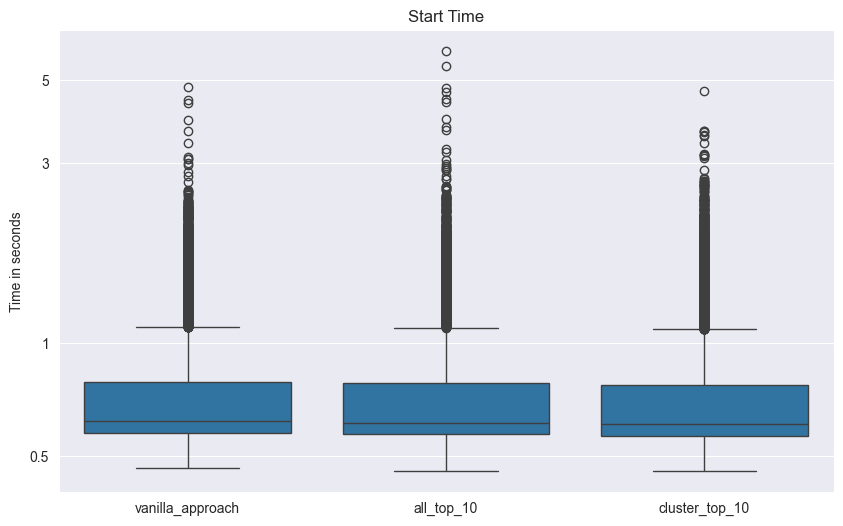

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='what', y='values', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.title('Start Time')
plt.yscale('log')
plt.yticks([0.5, 1, 3, 5],[0.5, 1, 3, 5])
plt.show()

In [59]:
toplot = pd.DataFrame({'values': pd.concat([vanilla_approach.buldingtime, all_top_10.buldingtime, cluster_top_10.buldingtime], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})

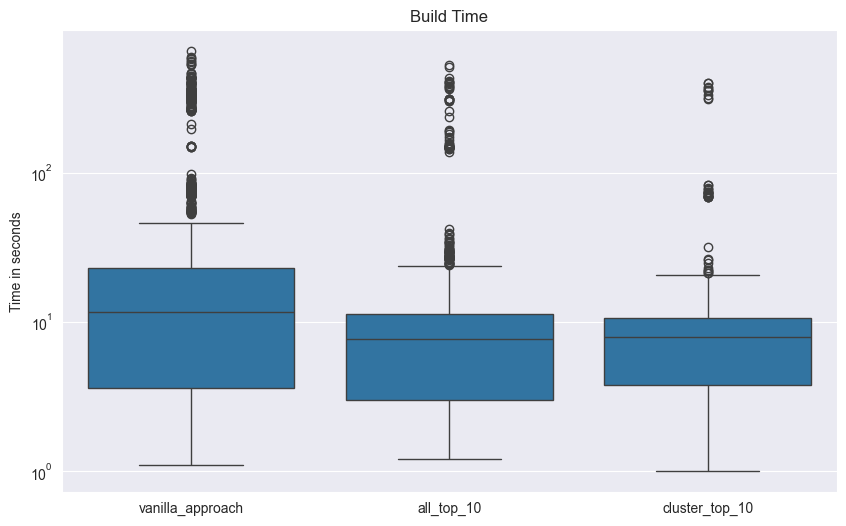

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='what', y='values', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.title('Build Time')
plt.yscale('log')
#plt.yticks([0.5, 1, 3, 5],[0.5, 1, 3, 5])
plt.show()

In [61]:
toplot = pd.DataFrame({'values': pd.concat([vanilla_approach.installtime, all_top_10.installtime, cluster_top_10.installtime], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})
toplot = toplot[toplot['values']>-1]

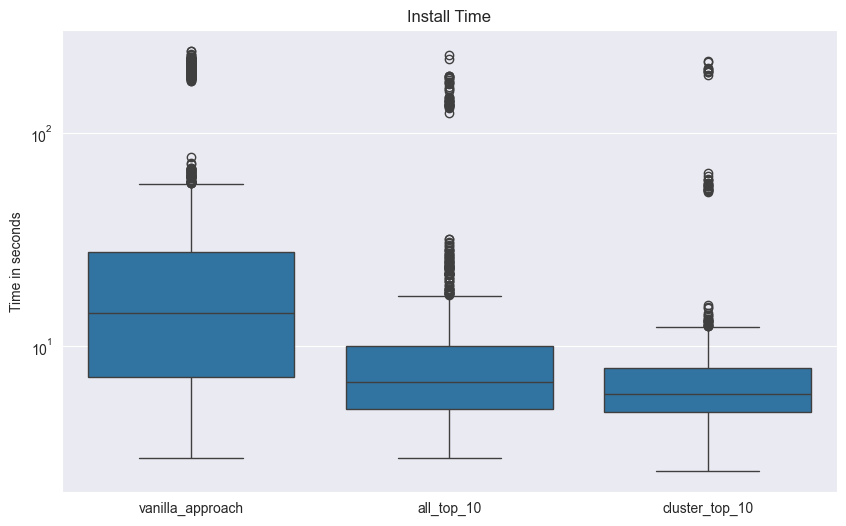

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='what', y='values', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.title('Install Time')
plt.yscale('log')
#plt.yticks([0.5, 1, 3, 5],[0.5, 1, 3, 5])
plt.show()

In [13]:
install = pd.read_csv("experiments/installations.csv")
install_libaries = pd.DataFrame()
for index, row in install.iterrows():
    if pd.isna(row[1]):
        ins = set()
    else: 
        ins = set(row[1].split(";"))
    all = set(row[2].split(";"))
    if pd.isna(row[3]):
        clu = set()
    else: 
        clu = set(row[3].split(";"))
    install_libaries = pd.concat([install_libaries, pd.DataFrame([[len(ins), len(ins.intersection(all)), len(ins.intersection(clu))]])], ignore_index=True)
install_libaries.columns = ['toInstall', 'AlreayInstalled_all', 'AlreayInstalled_cluster']


/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_6215/3142692610.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(row[1]):
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_6215/3142692610.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ins = set(row[1].split(";"))
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_6215/3142692610.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all = 

In [14]:
print(install_libaries.toInstall.describe())
print((install_libaries.toInstall - install_libaries.AlreayInstalled_all).describe())
print((install_libaries.toInstall - install_libaries.AlreayInstalled_cluster).describe())

count    207.000000
mean       1.434783
std        1.489232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: toInstall, dtype: float64
count    207.000000
mean       0.570048
std        0.888804
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
dtype: float64
count    207.000000
mean       0.048309
std        0.256156
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
dtype: float64
